In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import risktools.metrics as rm
import matplotlib.pyplot as plt
%matplotlib inline

# Базовый расчет

Базируется на предположении, что индекс и реплицирующий портфель акций <i>примерно одинаково ходят</i>, т.е. доходности линейно зависят друг от друга:

$$ r_m \sim r_P$$
$$| r_m - \sum_{k=1}^n w_kr_k | < c$$

Ок. Строим

Берем инструменты из индекса

In [2]:
mix = pd.read_excel('instr_codes.xlsx', sheetname='MIX')
mix = mix[mix.ticker!='MIX']
mix.sort_values(by='code', inplace=True)

In [3]:
mix.head()

ticker            code       w
24   AFKS  AFKS RX Equity  0.0083
33   AFLT  AFLT RX Equity  0.0043
43   AGRO  AGRO RX Equity  0.0020
38   AKRN  AKRN RX Equity  0.0028
16   ALRS  ALRS RX Equity  0.0137

Берем цены

In [4]:
pr = pd.read_excel('prices_mix.xlsx')

In [5]:
pr.head()

code       date  PX_OPEN  PX_HIGH   PX_LOW  PX_LAST
0  GMKN RX Equity 2015-07-13  8323.54  8557.72  8307.14  8534.02
1  GMKN RX Equity 2015-07-14  8555.89  8664.32  8542.23  8610.56
2  GMKN RX Equity 2015-07-15  8619.67  8713.53  8596.90  8645.19
3  GMKN RX Equity 2015-07-16  8665.23  8747.24  8645.19  8747.24
4  GMKN RX Equity 2015-07-17  8745.42  8820.13  8657.94  8688.92

Считаем 2-х дневные доходности

In [6]:
for code in pr.code.unique():
    idx = pr[pr.code==code].index
    pr.ix[idx, 'returns'] = rm.returns(pr.ix[idx, 'PX_LAST'], 2)

In [7]:
pr.head()

code       date  PX_OPEN  PX_HIGH   PX_LOW  PX_LAST   returns
0  GMKN RX Equity 2015-07-13  8323.54  8557.72  8307.14  8534.02       NaN
1  GMKN RX Equity 2015-07-14  8555.89  8664.32  8542.23  8610.56       NaN
2  GMKN RX Equity 2015-07-15  8619.67  8713.53  8596.90  8645.19  0.013027
3  GMKN RX Equity 2015-07-16  8665.23  8747.24  8645.19  8747.24  0.015874
4  GMKN RX Equity 2015-07-17  8745.42  8820.13  8657.94  8688.92  0.005058

In [8]:
ret = pr.pivot('date', 'code', 'returns').dropna()

In [9]:
ret_mix = ret['INDEXCF Index']
ret = ret[mix.code.values]

In [10]:
ret.head()

code        AFKS RX Equity  AFLT RX Equity  AGRO RX Equity  AKRN RX Equity  \
date                                                                         
2015-07-15        0.020879        0.022572        0.010225        0.063395   
2015-07-16        0.056725        0.015665       -0.010121        0.009999   
2015-07-17        0.033997        0.015144       -0.006073       -0.004234   
2015-07-20        0.020280       -0.018458        0.002045       -0.004188   
2015-07-21        0.026825       -0.011378       -0.004073        0.015453   

code        ALRS RX Equity  BANE RX Equity  BANEP RX Equity  CBOM RX Equity  \
date                                                                          
2015-07-15       -0.024173        0.015262         0.004403        0.000274   
2015-07-16        0.017940        0.060522         0.062997        0.006296   
2015-07-17        0.012244        0.037996         0.031822        0.003556   
2015-07-20        0.012628        0.009096        -0.010736       -0.003264   
2015-07-21        0.018284        0.002122         0.000771        0.002180   

code        CHMF RX Equity  DIXY RX Equity       ...        SNGSP RX Equity  \
date                                             ...                          
2015-07-15        0.013980        0.006163       ...               0.044565   
2015-07-16        0.004032       -0.003049       ...               0.105991   
2015-07-17       -0.004699        0.007657       ...               0.036883   
2015-07-20       -0.004016       -0.004587       ...              -0.005952   
2015-07-21        0.011144        0.003040       ...               0.007739   

code        TATN RX Equity  TATNP RX Equity  TRMK RX Equity  TRNFP RX Equity  \
date                                                                           
2015-07-15        0.051077         0.022983       -0.003442         0.036114   
2015-07-16        0.008486        -0.003234       -0.025649        -0.000507   
2015-07-17       -0.013380        -0.012266       -0.015553        -0.012697   
2015-07-20       -0.021034        -0.001947       -0.003509        -0.047426   
2015-07-21        0.004577         0.020915       -0.014035        -0.030701   

code        UPRO RX Equity  URKA RX Equity  VSMO RX Equity  VTBR RX Equity  \
date                                                                         
2015-07-15        0.025495        0.035714       -0.004430        0.004640   
2015-07-16       -0.008277        0.020812        0.003356       -0.009503   
2015-07-17       -0.031169        0.008867       -0.004449       -0.011819   
2015-07-20       -0.029970       -0.012825        0.000000       -0.018777   
2015-07-21       -0.023746       -0.015299        0.006704       -0.010311   

code        YNDX RX Equity  
date                        
2015-07-15        0.021004  
2015-07-16       -0.007955  
2015-07-17        0.028571  
2015-07-20        0.020619  
2015-07-21       -0.012222  

[5 rows x 50 columns]

In [11]:
ret_mix.head()

date
2015-07-15   -0.001065
2015-07-16    0.003388
2015-07-17    0.005398
2015-07-20   -0.015630
2015-07-21   -0.008721
Name: INDEXCF Index, dtype: float64

Собираем портфель из весов

In [12]:
Rport = np.dot(ret.as_matrix(), mix.w)

In [13]:
rez = pd.DataFrame(ret_mix)
rez['port'] = Rport

In [14]:
rez.head()

INDEXCF Index      port
date                               
2015-07-15      -0.001065  0.016384
2015-07-16       0.003388  0.019046
2015-07-17       0.005398  0.007015
2015-07-20      -0.015630 -0.014626
2015-07-21      -0.008721 -0.008640

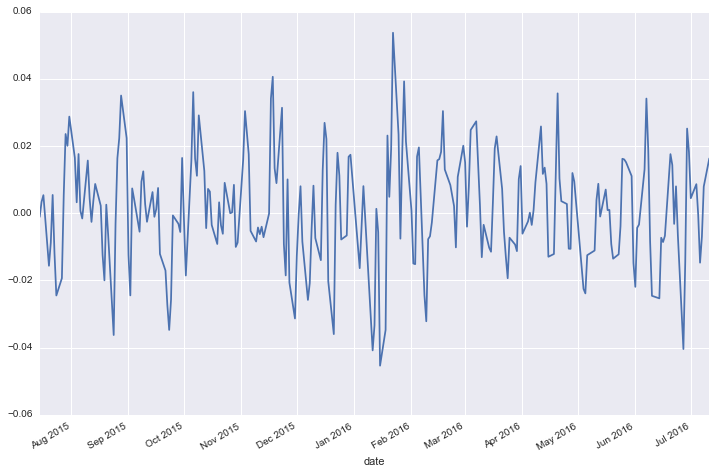

In [15]:
rez['INDEXCF Index'].plot(figsize=(12,8))

$$| r_m - \sum_{k=1}^n w_kr_k |$$

In [16]:
rez['synt'] = rez['INDEXCF Index'] - rez['port']

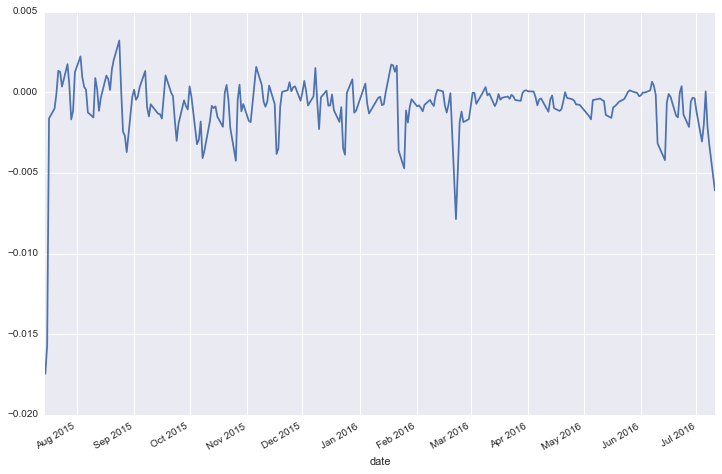

In [17]:
rez.synt.plot(figsize=(12,8))

Считаем базовое ограничения как исторический 99,9% VaR

In [18]:
var = rm.hvar(rez.synt)

In [19]:
var

0.01

# Альтернативный расчет

Строится на предположении, что доходность некоего инструмента, который есть разница цен индекса и портфеля, находится в ограничениях

$$ I = P_m - P_P$$
$$ P_p = \sum_{k=1}^n w_kp_k $$
$$ | \frac{I}{I_0} - 1| < c$$

Ок. Строим

Берем цены

In [20]:
pr2 = pr.pivot('date', 'code', 'PX_LAST').dropna()

In [21]:
pr2.head()

code        AFKS RX Equity  AFLT RX Equity  AGRO RX Equity  AKRN RX Equity  \
date                                                                         
2015-07-13          18.152           38.10        454.5553         2327.80   
2015-07-14          18.105           38.94        459.2031         2475.37   
2015-07-15          18.531           38.96        459.2031         2475.37   
2015-07-16          19.132           39.55        454.5553         2500.12   
2015-07-17          19.161           39.55        456.4144         2464.89   

code        ALRS RX Equity  BANE RX Equity  BANEP RX Equity  CBOM RX Equity  \
date                                                                          
2015-07-13           71.98         1788.70          1251.49           3.655   
2015-07-14           70.79         1762.34          1226.72           3.653   
2015-07-15           70.24         1816.00          1257.00           3.656   
2015-07-16           72.06         1869.00          1304.00           3.676   
2015-07-17           71.10         1885.00          1297.00           3.669   

code        CHMF RX Equity  DIXY RX Equity       ...        SNGSP RX Equity  \
date                                             ...                          
2015-07-13          541.48           324.5       ...                31.0177   
2015-07-14          548.13           328.0       ...                30.3800   
2015-07-15          549.05           326.5       ...                32.4000   
2015-07-16          550.34           327.0       ...                33.6000   
2015-07-17          546.47           329.0       ...                33.5950   

code        TATN RX Equity  TATNP RX Equity  TRMK RX Equity  TRNFP RX Equity  \
date                                                                           
2015-07-13         274.762         142.0545          55.487        132458.91   
2015-07-14         284.594         145.0378          55.869        137381.74   
2015-07-15         288.796         145.3193          55.296        137242.50   
2015-07-16         287.009         144.5688          54.436        137312.12   
2015-07-17         284.932         143.5368          54.436        135500.00   

code        UPRO RX Equity  URKA RX Equity  VSMO RX Equity  VTBR RX Equity  \
date                                                                         
2015-07-13           2.628          147.00         8176.59         0.07327   
2015-07-14           2.658          148.95         8095.09         0.07366   
2015-07-15           2.695          152.25         8140.37         0.07361   
2015-07-16           2.636          152.05         8122.26         0.07296   
2015-07-17           2.611          153.60         8104.15         0.07274   

code        YNDX RX Equity  
date                        
2015-07-13           857.0  
2015-07-14           880.0  
2015-07-15           875.0  
2015-07-16           873.0  
2015-07-17           900.0  

[5 rows x 51 columns]

In [22]:
pr2.columns

Index(['AFKS RX Equity', 'AFLT RX Equity', 'AGRO RX Equity', 'AKRN RX Equity',
       'ALRS RX Equity', 'BANE RX Equity', 'BANEP RX Equity', 'CBOM RX Equity',
       'CHMF RX Equity', 'DIXY RX Equity', 'FEES RX Equity', 'GAZP RX Equity',
       'GCHE RX Equity', 'GMKN RX Equity', 'HYDR RX Equity', 'INDEXCF Index',
       'IRAO RX Equity', 'LKOH RX Equity', 'LNTA RX Equity', 'LSRG RX Equity',
       'MAGN RX Equity', 'MFON RX Equity', 'MGNT RX Equity', 'MOEX RX Equity',
       'MTSS RX Equity', 'MVID RX Equity', 'NKNC RX Equity', 'NLMK RX Equity',
       'NVTK RX Equity', 'PHOR RX Equity', 'PIKK RX Equity', 'PLZL RX Equity',
       'POLY RX Equity', 'ROSN RX Equity', 'RSTI RX Equity', 'RTKM RX Equity',
       'RTKMP RX Equity', 'RUAL RX Equity', 'SBER RX Equity',
       'SBERP RX Equity', 'SNGS RX Equity', 'SNGSP RX Equity',
       'TATN RX Equity', 'TATNP RX Equity', 'TRMK RX Equity',
       'TRNFP RX Equity', 'UPRO RX Equity', 'URKA RX Equity', 'VSMO RX Equity',
       'VTBR RX Equity

In [23]:
pr_mix = pr2['INDEXCF Index']

In [24]:
del(pr2['INDEXCF Index'])

In [25]:
pr2.head()

code        AFKS RX Equity  AFLT RX Equity  AGRO RX Equity  AKRN RX Equity  \
date                                                                         
2015-07-13          18.152           38.10        454.5553         2327.80   
2015-07-14          18.105           38.94        459.2031         2475.37   
2015-07-15          18.531           38.96        459.2031         2475.37   
2015-07-16          19.132           39.55        454.5553         2500.12   
2015-07-17          19.161           39.55        456.4144         2464.89   

code        ALRS RX Equity  BANE RX Equity  BANEP RX Equity  CBOM RX Equity  \
date                                                                          
2015-07-13           71.98         1788.70          1251.49           3.655   
2015-07-14           70.79         1762.34          1226.72           3.653   
2015-07-15           70.24         1816.00          1257.00           3.656   
2015-07-16           72.06         1869.00          1304.00           3.676   
2015-07-17           71.10         1885.00          1297.00           3.669   

code        CHMF RX Equity  DIXY RX Equity       ...        SNGSP RX Equity  \
date                                             ...                          
2015-07-13          541.48           324.5       ...                31.0177   
2015-07-14          548.13           328.0       ...                30.3800   
2015-07-15          549.05           326.5       ...                32.4000   
2015-07-16          550.34           327.0       ...                33.6000   
2015-07-17          546.47           329.0       ...                33.5950   

code        TATN RX Equity  TATNP RX Equity  TRMK RX Equity  TRNFP RX Equity  \
date                                                                           
2015-07-13         274.762         142.0545          55.487        132458.91   
2015-07-14         284.594         145.0378          55.869        137381.74   
2015-07-15         288.796         145.3193          55.296        137242.50   
2015-07-16         287.009         144.5688          54.436        137312.12   
2015-07-17         284.932         143.5368          54.436        135500.00   

code        UPRO RX Equity  URKA RX Equity  VSMO RX Equity  VTBR RX Equity  \
date                                                                         
2015-07-13           2.628          147.00         8176.59         0.07327   
2015-07-14           2.658          148.95         8095.09         0.07366   
2015-07-15           2.695          152.25         8140.37         0.07361   
2015-07-16           2.636          152.05         8122.26         0.07296   
2015-07-17           2.611          153.60         8104.15         0.07274   

code        YNDX RX Equity  
date                        
2015-07-13           857.0  
2015-07-14           880.0  
2015-07-15           875.0  
2015-07-16           873.0  
2015-07-17           900.0  

[5 rows x 50 columns]

Строим синтетический инструмент

In [26]:
rez2 = pd.DataFrame(pr_mix)
rez2['pr_port'] = np.dot(pr2.as_matrix(), mix.w)
rez2['synt_pr'] = pr_mix - rez2['pr_port']

Считаем его доходность

In [27]:
rez2['synt'] = rm.returns(rez2['synt_pr'], 2)

In [28]:
rez2.head()

INDEXCF Index      pr_port      synt_pr      synt
date                                                         
2015-07-13        1642.97  5501.625420 -3858.655420       NaN
2015-07-14        1647.01  5655.374219 -4008.364219       NaN
2015-07-15        1641.22  5658.128792 -4016.908792  0.041013
2015-07-16        1652.59  5672.521757 -4019.931757  0.002886
2015-07-17        1650.08  5614.346769 -3964.266769 -0.013105

Покажем доходности

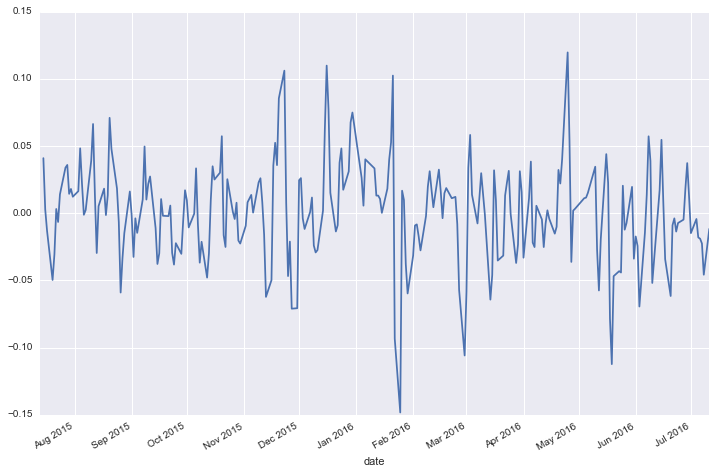

In [34]:
rez2['synt'].plot(figsize=(12,8))

In [35]:
var2 = rm.hvar(rez2['synt'])

In [36]:
var2

0.115

Какой-то слишком волатильный инструмент получился, не? Почему же все поголовно на арбитраже не зарабатывают?
Бред идеи заключается в том, что цена индекса не есть сумма цен бумаг на их веса. Он расчитывается по методике www.micex.ru/file/26342. И формируя некий инструмент, как разность этих цен, мы формируем не совсем понятную вещь. И затем по ее доходностям пытаемся что-то определить...

Ок. Посмотрим на зависимости доходностей индекса и портфеля

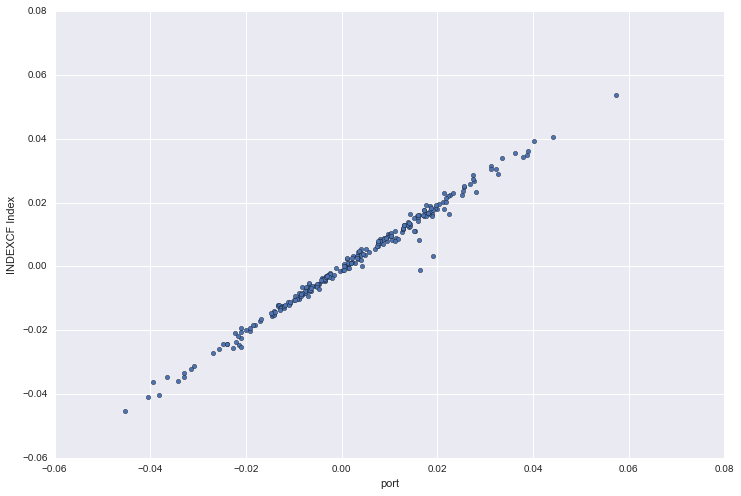

In [37]:
rez.plot(kind='scatter', y='INDEXCF Index', x='port', figsize=(12,8))

Подтверждается исходное предположение о линейной зависимости доходностей.

А теперь посмотрим на зависимость цен портфеля и индекса

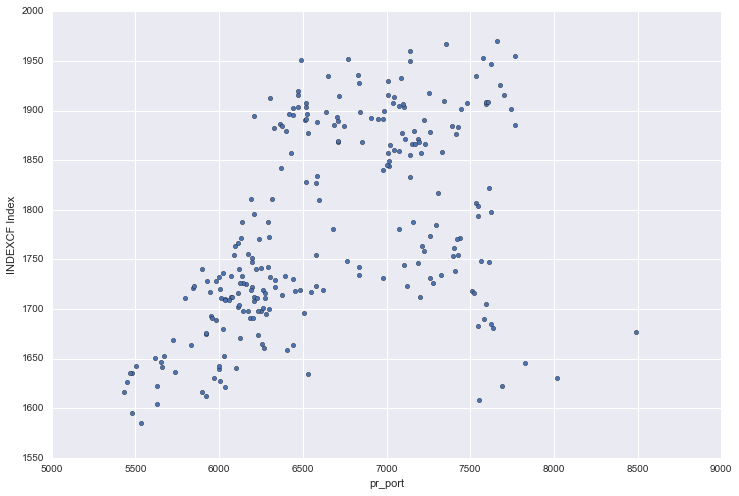

In [39]:
rez2.plot(kind='scatter', y='INDEXCF Index', x='pr_port', figsize=(12,8))

Отсюда я могу сделать вывод, что между ценами портфеля и индекса нет строгой статистической зависимости. А между доходностями есть. У меня вообщем-то к методике больше вопросов нет.